# 케라스 CNN Fashion MNIST

#### module import

In [2]:
%load_ext tensorboard

In [3]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input


### 데이터 로드 및 전처리

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[..., np.newaxis]
x_test  = x_test[..., np.newaxis]

x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [5]:
class_names = ["T-shirt/top", 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 모델 구성 및 컴파일
- 임의의 모델

In [6]:
def build_model():
    model = Sequential()

    input = Input(shape = (28, 28, 1))
    output = Conv2D(filters = 32, kernel_size = (3, 3))(input)
    output = Conv2D(filters = 64, kernel_size = (3, 3))(output)
    output = Conv2D(filters = 64, kernel_size = (3, 3))(output)
    output = Flatten()(output)
    output = Dense(units = 128, activation = 'relu')(output)
    output = Dense(units = 64, activation = 'relu')(output)
    output = Dense(units = 10, activation = 'softmax')(output)

    model = Model(inputs = [input],
                  outputs = output)
    
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['acc'])
    return model

model_1 = build_model()
model_1.summary()
    

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### 모델 학습
- 런타임 GPU로 설정

In [7]:
hist_1 = model_1.fit(x_train, y_train,
                     epochs = 25,
                     validation_split = 0.3,
                     batch_size = 128)

Epoch 1/25
329/329 [==============================] - 4s 13ms/step - loss: 0.5018 - acc: 0.8222 - val_loss: 0.4033 - val_acc: 0.8552
Epoch 2/25
329/329 [==============================] - 4s 12ms/step - loss: 0.3430 - acc: 0.8745 - val_loss: 0.3804 - val_acc: 0.8632
Epoch 3/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2944 - acc: 0.8921 - val_loss: 0.3492 - val_acc: 0.8760
Epoch 4/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2394 - acc: 0.9118 - val_loss: 0.3772 - val_acc: 0.8728
Epoch 5/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2128 - acc: 0.9206 - val_loss: 0.4197 - val_acc: 0.8608
Epoch 6/25
329/329 [==============================] - 4s 12ms/step - loss: 0.1832 - acc: 0.9327 - val_loss: 0.4476 - val_acc: 0.8679
Epoch 7/25
329/329 [==============================] - 4s 12ms/step - loss: 0.1580 - acc: 0.9419 - val_loss: 0.4668 - val_acc: 0.8669
Epoch 8/25
329/329 [==============================] - 4s 12ms/step - 

### 학습 결과 시각화

In [7]:
hist_1.history.keys()

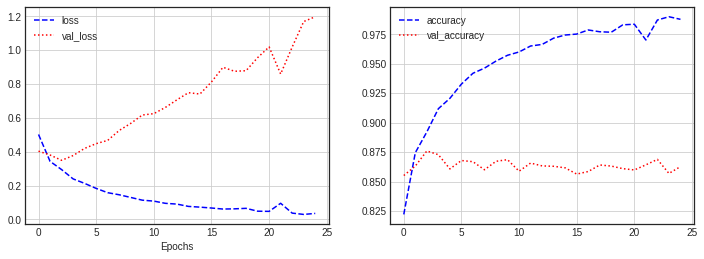

In [8]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_1.history['loss'], 'b--', label = 'loss')
plt.plot(hist_1.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel("Epochs")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_1.history['acc'], 'b--', label = 'accuracy')
plt.plot(hist_1.history['val_acc'], 'r:', label = 'val_accuracy')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [9]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3547 - acc: 0.8528


[1.3546862602233887, 0.8528000116348267]

### 모델 재구성
- 학습 파라미터의 수 비교

In [11]:
def build_model2():
    model = Sequential()

    input = Input(shape = (28, 28, 1))
    output = Conv2D(filters = 32, kernel_size = (3, 3))(input)
    output = MaxPool2D(strides = (2, 2))(output)
    output = Conv2D(filters = 64, kernel_size = (3, 3))(output)
    output = MaxPool2D(strides = (2, 2))(output)
    output = Conv2D(filters = 64, kernel_size = (3, 3))(output)
    output = MaxPool2D(strides = (2, 2))(output)
    
    output = Flatten()(output)

    output = Dense(units = 128, activation = 'relu')(output)
    output = Dropout(0.3)(output)
    output = Dense(units = 64, activation = 'relu')(output)
    output = Dropout(0.3)(output)
    output = Dense(units = 10, activation = 'softmax')(output)

    model = Model(inputs = [input],
                  outputs = output)
    
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['acc'])
    return model

model_2 = build_model2()
model_2.summary()
    

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)         

### 모델 재학습

In [12]:
hist_2 = model_2.fit(x_train, y_train,
                     epochs = 25,
                     validation_split = 0.3,
                     batch_size = 128)

Epoch 1/25
329/329 [==============================] - 2s 6ms/step - loss: 0.9044 - acc: 0.6721 - val_loss: 0.5887 - val_acc: 0.7898
Epoch 2/25
329/329 [==============================] - 2s 5ms/step - loss: 0.5854 - acc: 0.7901 - val_loss: 0.4929 - val_acc: 0.8173
Epoch 3/25
329/329 [==============================] - 2s 5ms/step - loss: 0.5101 - acc: 0.8179 - val_loss: 0.4493 - val_acc: 0.8354
Epoch 4/25
329/329 [==============================] - 2s 5ms/step - loss: 0.4539 - acc: 0.8373 - val_loss: 0.4160 - val_acc: 0.8443
Epoch 5/25
329/329 [==============================] - 2s 5ms/step - loss: 0.4223 - acc: 0.8488 - val_loss: 0.3817 - val_acc: 0.8610
Epoch 6/25
329/329 [==============================] - 2s 5ms/step - loss: 0.3886 - acc: 0.8606 - val_loss: 0.4035 - val_acc: 0.8481
Epoch 7/25
329/329 [==============================] - 2s 5ms/step - loss: 0.3682 - acc: 0.8682 - val_loss: 0.3568 - val_acc: 0.8697
Epoch 8/25
329/329 [==============================] - 2s 5ms/step - loss: 0.

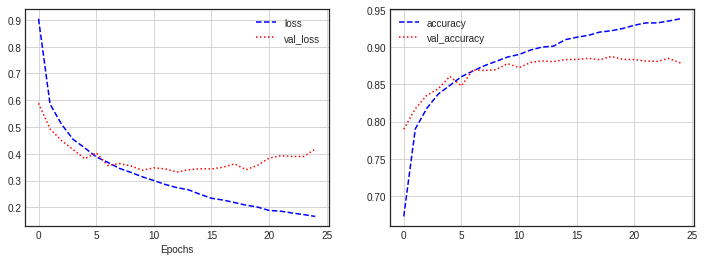

In [13]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_2.history['loss'], 'b--', label = 'loss')
plt.plot(hist_2.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel("Epochs")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_2.history['acc'], 'b--', label = 'accuracy')
plt.plot(hist_2.history['val_acc'], 'r:', label = 'val_accuracy')
plt.grid()
plt.legend()

plt.show()

### 모델 재평가

In [14]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4433 - acc: 0.8724


[0.44334959983825684, 0.8723999857902527]

## 모델 성능 높이기 - 많은 레이어 쌓기

In [15]:
from tensorflow.keras.layers import BatchNormalization, ReLU

In [19]:
def build_model3():
    model = Sequential()

    input = Input(shape = (28, 28, 1))
    output = Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same')(input)
    output = Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'valid')(output)
    output = MaxPool2D(strides = (2, 2))(output)
    output = Dropout(0.5)(output)
    
    output = Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same')(output)
    output = Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'valid')(output)
    output = MaxPool2D(strides = (2, 2))(output)
    output = Dropout(0.5)(output)
    
    output = Flatten()(output)
    output = Dense(units = 256, activation = 'relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(units = 100, activation = 'relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(units = 10, activation = 'softmax')(output)

    model = Model(inputs = [input],
                  outputs = output)
    
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['acc'])
    return model

model_3 = build_model3()
model_3.summary()
    

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 256)     

## 모델 학습 및 결과 시각화

In [20]:
hist_3 = model_3.fit(x_train, y_train,
                     epochs = 25,
                     validation_split = 0.3,
                     batch_size = 128)

Epoch 1/25
329/329 [==============================] - 6s 17ms/step - loss: 0.8418 - acc: 0.6920 - val_loss: 0.4407 - val_acc: 0.8296
Epoch 2/25
329/329 [==============================] - 5s 17ms/step - loss: 0.4787 - acc: 0.8301 - val_loss: 0.3526 - val_acc: 0.8702
Epoch 3/25
329/329 [==============================] - 5s 16ms/step - loss: 0.3963 - acc: 0.8622 - val_loss: 0.2986 - val_acc: 0.8900
Epoch 4/25
329/329 [==============================] - 5s 17ms/step - loss: 0.3568 - acc: 0.8751 - val_loss: 0.2736 - val_acc: 0.8993
Epoch 5/25
329/329 [==============================] - 6s 17ms/step - loss: 0.3196 - acc: 0.8888 - val_loss: 0.2503 - val_acc: 0.9086
Epoch 6/25
329/329 [==============================] - 5s 17ms/step - loss: 0.2994 - acc: 0.8946 - val_loss: 0.2370 - val_acc: 0.9115
Epoch 7/25
329/329 [==============================] - 5s 17ms/step - loss: 0.2926 - acc: 0.8967 - val_loss: 0.2373 - val_acc: 0.9148
Epoch 8/25
329/329 [==============================] - 5s 17ms/step - 

- 과적합은 되지 않았지만 층을 늘려도 좋은 성능을 낼 수 있음

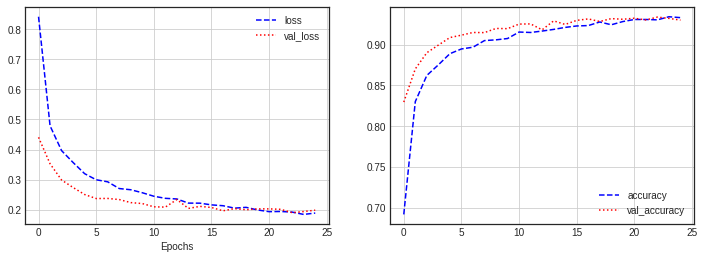

In [21]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_3.history['loss'], 'b--', label = 'loss')
plt.plot(hist_3.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel("Epochs")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_3.history['acc'], 'b--', label = 'accuracy')
plt.plot(hist_3.history['val_acc'], 'r:', label = 'val_accuracy')
plt.grid()
plt.legend()

plt.show()

In [22]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2121 - acc: 0.9279


[0.2120664268732071, 0.9279000163078308]

## 모델 성능 높이기 - 이미지 보강(Image Augmentation)

- 주요 인자 참고: https://keras.io/ko/preprocessing/image/

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.2,
    shear_range = 0.6,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)

In [26]:
augment_size = 200

In [27]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [29]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28 * 28 * 1),
                                         augment_size).reshape(-1, 28, 28, 1),
                                 np.zeros(augment_size), batch_size = augment_size,
                                 shuffle = False).next()[0]

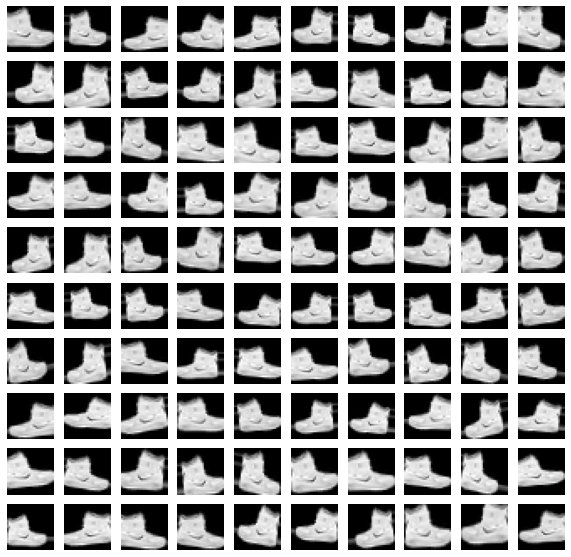

In [30]:
plt.figure(figsize = (10, 10))

for i in range(1, 101):
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.imshow(x_augment[i-1].reshape(28, 28), cmap = 'gray')

데이터 추가

In [31]:
image_generator = ImageDataGenerator(
    rotation_range = 15,
    zoom_range = 0.1,
    shear_range = 0.6,
    width_shift_range = 0.15,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)

In [32]:
augment_size = 30000

In [33]:
random_mask = np.random.randint(x_train.shape[0], size = augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [34]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size = augment_size, shuffle = False).next()[0]

x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(x_train.shape)
print(y_train.shape)

## 모델 학습 및 결과 시각화

In [37]:
model_4 = build_model3()
model_4.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 256)     

In [38]:
hist_4 = model_4.fit(x_train, y_train,
                     epochs = 25,
                     validation_split = 0.3,
                     batch_size = 128)

Epoch 1/25
493/493 [==============================] - 9s 18ms/step - loss: 0.7899 - acc: 0.7146 - val_loss: 0.9253 - val_acc: 0.6570
Epoch 2/25
493/493 [==============================] - 8s 17ms/step - loss: 0.4626 - acc: 0.8357 - val_loss: 0.7510 - val_acc: 0.7244
Epoch 3/25
493/493 [==============================] - 8s 17ms/step - loss: 0.3888 - acc: 0.8645 - val_loss: 0.6594 - val_acc: 0.7521
Epoch 4/25
493/493 [==============================] - 8s 17ms/step - loss: 0.3455 - acc: 0.8784 - val_loss: 0.6425 - val_acc: 0.7571
Epoch 5/25
493/493 [==============================] - 8s 17ms/step - loss: 0.3227 - acc: 0.8861 - val_loss: 0.6196 - val_acc: 0.7722
Epoch 6/25
493/493 [==============================] - 8s 17ms/step - loss: 0.3081 - acc: 0.8926 - val_loss: 0.5519 - val_acc: 0.7939
Epoch 7/25
493/493 [==============================] - 8s 17ms/step - loss: 0.2894 - acc: 0.8974 - val_loss: 0.5320 - val_acc: 0.8043
Epoch 8/25
493/493 [==============================] - 8s 17ms/step - 

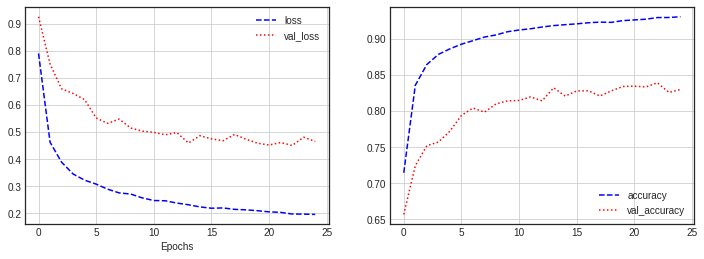

In [39]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_4.history['loss'], 'b--', label = 'loss')
plt.plot(hist_4.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel("Epochs")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_4.history['acc'], 'b--', label = 'accuracy')
plt.plot(hist_4.history['val_acc'], 'r:', label = 'val_accuracy')
plt.grid()
plt.legend()

plt.show()

- 학습 인자를 이전과 다르게 주면서 학습하면 더 잘 나올것으로 판단

In [40]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2013 - acc: 0.9294


[0.20127716660499573, 0.9294000267982483]